> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Before submitting your project, it will be a good idea to go back through your report and remove these sections to make the presentation of your work as tidy as possible. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: FBI Gun Data

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> **Tip**: In this section of the report, provide a brief introduction to the dataset you've selected for analysis. At the end of this section, describe the questions that you plan on exploring over the course of the report. Try to build your report around the analysis of at least one dependent variable and three independent variables. If you're not sure what questions to ask, then make sure you familiarize yourself with the dataset, its variables and the dataset context for ideas of what to explore.

> If you haven't yet selected and downloaded your data, make sure you do that first before coming back here. In order to work with the data in this workspace, you also need to upload it to the workspace. To do so, click on the jupyter icon in the upper left to be taken back to the workspace directory. There should be an 'Upload' button in the upper right that will let you add your data file(s) to the workspace. You can then click on the .ipynb file name to come back here.

In [1]:
import pandas as pd
import numpy as np
import seaborn as se
import matplotlib.pyplot as plt
% matplotlib inline
import seaborn as sns

<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

In [2]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
ce = pd.read_csv('census_data.csv')
gu = pd.read_csv('gun_data.csv')
# Gun data
gu.head()

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
0,2017-09,Alabama,16717.0,0.0,5734.0,6320.0,221.0,317,0.0,15.0,...,0.0,0.0,0.0,9.0,16.0,3.0,0.0,0.0,3.0,32019
1,2017-09,Alaska,209.0,2.0,2320.0,2930.0,219.0,160,0.0,5.0,...,0.0,0.0,0.0,17.0,24.0,1.0,0.0,0.0,0.0,6303
2,2017-09,Arizona,5069.0,382.0,11063.0,7946.0,920.0,631,0.0,13.0,...,0.0,0.0,0.0,38.0,12.0,2.0,0.0,0.0,0.0,28394
3,2017-09,Arkansas,2935.0,632.0,4347.0,6063.0,165.0,366,51.0,12.0,...,0.0,0.0,0.0,13.0,23.0,0.0,0.0,2.0,1.0,17747
4,2017-09,California,57839.0,0.0,37165.0,24581.0,2984.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,123506


In [3]:
# Census data
ce.head()

,Fact,Fact Note,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,"Population estimates, July 1, 2016, (V2016)",NaN,"4,863,300","741,894","6,931,071","2,988,248","39,250,017","5,540,545","3,576,452","952,065",...,865454,6651194,"27,862,596","3,051,217","624,594","8,411,808","7,288,000","1,831,102","5,778,708","585,501"
1,"Population estimates base, April 1, 2010, (V2...",NaN,"4,780,131","710,249","6,392,301","2,916,025","37,254,522","5,029,324","3,574,114","897,936",...,814195,6346298,"25,146,100","2,763,888","625,741","8,001,041","6,724,545","1,853,011","5,687,289","563,767"
2,"Population, percent change - April 1, 2010 (es...",NaN,1.70%,4.50%,8.40%,2.50%,5.40%,10.20%,0.10%,6.00%,...,0.063,0.048,10.80%,10.40%,-0.20%,5.10%,8.40%,-1.20%,1.60%,3.90%
3,"Population, Census, April 1, 2010",NaN,"4,779,736","710,231","6,392,017","2,915,918","37,253,956","5,029,196","3,574,097","897,934",...,814180,6346105,"25,145,561","2,763,885","625,741","8,001,024","6,724,540","1,852,994","5,686,986","563,626"
4,"Persons under 5 years, percent, July 1, 2016, ...",NaN,6.00%,7.30%,6.30%,6.40%,6.30%,6.10%,5.20%,5.80%,...,0.071,0.061,7.20%,8.30%,4.90%,6.10%,6.20%,5.50%,5.80%,6.50%


> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).

### Data Cleaning (2 steps: Gun Data & Census Data)

In [4]:
# After discussing the structure of the data and any problems that need to be
# cleaned, perform those cleaning steps in the second part of this section.

### First of Cleaning data 'Gun Data'

In [5]:
gu.shape

(12485, 27)

In [6]:
gu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12485 entries, 0 to 12484
Data columns (total 27 columns):
month                        12485 non-null object
state                        12485 non-null object
permit                       12461 non-null float64
permit_recheck               1100 non-null float64
handgun                      12465 non-null float64
long_gun                     12466 non-null float64
other                        5500 non-null float64
multiple                     12485 non-null int64
admin                        12462 non-null float64
prepawn_handgun              10542 non-null float64
prepawn_long_gun             10540 non-null float64
prepawn_other                5115 non-null float64
redemption_handgun           10545 non-null float64
redemption_long_gun          10544 non-null float64
redemption_other             5115 non-null float64
returned_handgun             2200 non-null float64
returned_long_gun            2145 non-null float64
returned_other   

In [7]:
gu.columns.values

array(['month', 'state', 'permit', 'permit_recheck', 'handgun', 'long_gun',
       'other', 'multiple', 'admin', 'prepawn_handgun', 'prepawn_long_gun',
       'prepawn_other', 'redemption_handgun', 'redemption_long_gun',
       'redemption_other', 'returned_handgun', 'returned_long_gun',
       'returned_other', 'rentals_handgun', 'rentals_long_gun',
       'private_sale_handgun', 'private_sale_long_gun',
       'private_sale_other', 'return_to_seller_handgun',
       'return_to_seller_long_gun', 'return_to_seller_other', 'totals'], dtype=object)

In [8]:
gu.describe()

,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,prepawn_long_gun,prepawn_other,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
count,12461.000000,1100.000000,12465.000000,12466.000000,5500.000000,12485.000000,12462.000000,10542.000000,10540.000000,5115.000000,...,1815.000000,990.000000,825.000000,2750.000000,2750.000000,2750.000000,2475.000000,2750.000000,2255.000000,12485.000000
mean,6413.629404,1165.956364,5940.881107,7810.847585,360.471636,268.603364,58.898090,4.828021,7.834156,0.165591,...,1.027548,0.076768,0.087273,14.936000,11.602909,1.030182,0.402020,0.441818,0.105987,21595.725911
std,23752.338269,9224.200609,8618.584060,9309.846140,1349.478273,783.185073,604.814818,10.907756,16.468028,1.057105,...,4.386296,0.634503,0.671649,71.216021,54.253090,4.467843,1.446568,1.528223,0.427363,32591.418387
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,865.000000,2078.250000,17.000000,15.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4638.000000
50%,518.000000,0.000000,3059.000000,5122.000000,121.000000,125.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12399.000000
75%,4272.000000,0.000000,7280.000000,10380.750000,354.000000,301.000000,0.000000,5.000000,8.000000,0.000000,...,0.000000,0.000000,0.000000,2.000000,4.000000,0.000000,0.000000,0.000000,0.000000,25453.000000
max,522188.000000,116681.000000,107224.000000,108058.000000,77929.000000,38907.000000,28083.000000,164.000000,269.000000,49.000000,...,64.000000,12.000000,12.000000,1017.000000,777.000000,71.000000,28.000000,17.000000,4.000000,541978.000000


#### match two datasets

 Run: test = ce.loc[:, (ce.columns != 'Fact') & (ce.columns != 'Fact Note')]
      test.columns.unique() == gu['state'].unique()
 After except for two columns they should only be different. 
 Error: Lengths must match to compare!

In [9]:
gu['state'].nunique()

55

In [10]:
len(ce.columns)

52

In [11]:
ce.columns.unique()

Index(['Fact', 'Fact Note', 'Alabama', 'Alaska', 'Arizona', 'Arkansas',
       'California', 'Colorado', 'Connecticut', 'Delaware', 'Florida',
       'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas',
       'Kentucky', 'Louisiana', 'Maine', 'Maryland', 'Massachusetts',
       'Michigan', 'Minnesota', 'Mississippi', 'Missouri', 'Montana',
       'Nebraska', 'Nevada', 'New Hampshire', 'New Jersey', 'New Mexico',
       'New York', 'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma',
       'Oregon', 'Pennsylvania', 'Rhode Island', 'South Carolina',
       'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia',
       'Washington', 'West Virginia', 'Wisconsin', 'Wyoming'],
      dtype='object')

unique names of columns in census data

In [12]:
gu['state'].unique()

array(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California',
       'Colorado', 'Connecticut', 'Delaware', 'District of Columbia',
       'Florida', 'Georgia', 'Guam', 'Hawaii', 'Idaho', 'Illinois',
       'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine',
       'Mariana Islands', 'Maryland', 'Massachusetts', 'Michigan',
       'Minnesota', 'Mississippi', 'Missouri', 'Montana', 'Nebraska',
       'Nevada', 'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Puerto Rico', 'Rhode Island', 'South Carolina',
       'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Vermont',
       'Virgin Islands', 'Virginia', 'Washington', 'West Virginia',
       'Wisconsin', 'Wyoming'], dtype=object)

unique names of state in Gun data

##### Census_data did not include 'Guam',' Puerto Rico', 'District Columbia', 'Virgin Islands', or 'Mariana Islands'

In [13]:
gu = gu[(gu.state != 'Guam')&(gu.state != 'Puerto Rico')&(gu.state != 'District of Columbia')&(gu.state != 'Virgin Islands')&(gu.state != 'Mariana Islands')]

In [14]:
test = ce.loc[:, (ce.columns != 'Fact') & (ce.columns != 'Fact Note')]
test.columns.unique() == gu['state'].unique()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True], dtype=bool)

#### That's it !
check for matching is done.

In [15]:
gu_capita = gu.drop([ 'permit', 'permit_recheck', 'handgun',
       'long_gun', 'other', 'multiple', 'admin', 'prepawn_handgun',
       'prepawn_long_gun', 'prepawn_other', 'redemption_handgun',
       'redemption_long_gun', 'redemption_other', 'returned_handgun',
       'returned_long_gun', 'returned_other', 'rentals_handgun',
       'rentals_long_gun', 'private_sale_handgun',
       'private_sale_long_gun', 'private_sale_other',
       'return_to_seller_handgun', 'return_to_seller_long_gun',
       'return_to_seller_other'], axis = 1)
gu_capita.head()

,month,state,totals
0,2017-09,Alabama,32019
1,2017-09,Alaska,6303
2,2017-09,Arizona,28394
3,2017-09,Arkansas,17747
4,2017-09,California,123506


Drop all the variables we don't need it in calculate per capita 

In [16]:
gu_capita['month'] = pd.to_datetime(gu['month'])
gu_capita.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11350 entries, 0 to 12484
Data columns (total 3 columns):
month     11350 non-null datetime64[ns]
state     11350 non-null object
totals    11350 non-null int64
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 354.7+ KB


In [17]:
gu_2010 = gu_capita[gu_capita['month'] == '2010-04-01']
gu_2010.head(5)

,month,state,totals
4895,2010-04-01,Alabama,20791
4896,2010-04-01,Alaska,6411
4897,2010-04-01,Arizona,16578
4898,2010-04-01,Arkansas,14563
4899,2010-04-01,California,80750


Above: Get all in the 2010-04-01 

In [18]:
gu_2010.describe()

,totals
count,50.0000
mean,24517.7400
std,34280.1673
min,963.0000
25%,7197.5000
50%,15242.5000
75%,26335.5000
max,211261.0000


Above: describe of statistical details for 2010

In [19]:
gu_2016 = gu_capita[gu_capita['month'] == '2016-07-01' ]
gu_2016.head(5)

,month,state,totals
770,2016-07-01,Alabama,48927
771,2016-07-01,Alaska,6793
772,2016-07-01,Arizona,34496
773,2016-07-01,Arkansas,19378
774,2016-07-01,California,190218


Above: Get all in the 2016-07-01 

In [20]:

gu_2016.describe()

,totals
count,50.000000
mean,43710.400000
std,61544.999748
min,1565.000000
25%,11823.000000
50%,25379.500000
75%,46008.500000
max,363085.000000


Above: describe of statistical details for 2016

In [21]:
concat_gu = pd.concat([gu_2010,gu_2016 ], keys=['2010-04-01', '2016-07-01'], axis = 0)
concat_gu.head()

month       state  totals
2010-04-01 4895 2010-04-01     Alabama   20791
           4896 2010-04-01      Alaska    6411
           4897 2010-04-01     Arizona   16578
           4898 2010-04-01    Arkansas   14563
           4899 2010-04-01  California   80750

Merge 2010 and 2016 to concat_gu

In [22]:
# Reset Index
concat_gu.reset_index(drop=True, inplace=True)

In [23]:
concat_gu.tail(5)

,month,state,totals
95,2016-07-01,Virginia,43574
96,2016-07-01,Washington,47887
97,2016-07-01,West Virginia,16791
98,2016-07-01,Wisconsin,38922
99,2016-07-01,Wyoming,4585


In [24]:
concat_gu.head(5)

,month,state,totals
0,2010-04-01,Alabama,20791
1,2010-04-01,Alaska,6411
2,2010-04-01,Arizona,16578
3,2010-04-01,Arkansas,14563
4,2010-04-01,California,80750


#### Second of Cleaning data 'Census Data'

In [25]:
ce.head()

,Fact,Fact Note,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,"Population estimates, July 1, 2016, (V2016)",NaN,"4,863,300","741,894","6,931,071","2,988,248","39,250,017","5,540,545","3,576,452","952,065",...,865454,6651194,"27,862,596","3,051,217","624,594","8,411,808","7,288,000","1,831,102","5,778,708","585,501"
1,"Population estimates base, April 1, 2010, (V2...",NaN,"4,780,131","710,249","6,392,301","2,916,025","37,254,522","5,029,324","3,574,114","897,936",...,814195,6346298,"25,146,100","2,763,888","625,741","8,001,041","6,724,545","1,853,011","5,687,289","563,767"
2,"Population, percent change - April 1, 2010 (es...",NaN,1.70%,4.50%,8.40%,2.50%,5.40%,10.20%,0.10%,6.00%,...,0.063,0.048,10.80%,10.40%,-0.20%,5.10%,8.40%,-1.20%,1.60%,3.90%
3,"Population, Census, April 1, 2010",NaN,"4,779,736","710,231","6,392,017","2,915,918","37,253,956","5,029,196","3,574,097","897,934",...,814180,6346105,"25,145,561","2,763,885","625,741","8,001,024","6,724,540","1,852,994","5,686,986","563,626"
4,"Persons under 5 years, percent, July 1, 2016, ...",NaN,6.00%,7.30%,6.30%,6.40%,6.30%,6.10%,5.20%,5.80%,...,0.071,0.061,7.20%,8.30%,4.90%,6.10%,6.20%,5.50%,5.80%,6.50%


In [26]:
#Droppping all the columns that is not associated with gun_data and reset its index
ce = ce.drop(ce.index[51: 85]).reset_index()

#Droping the second column 'Fact Note'
ce = ce.drop(['Fact Note'], axis =1 )

In [27]:
ce.head()

,index,Fact,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,0,"Population estimates, July 1, 2016, (V2016)","4,863,300","741,894","6,931,071","2,988,248","39,250,017","5,540,545","3,576,452","952,065",...,865454,6651194,"27,862,596","3,051,217","624,594","8,411,808","7,288,000","1,831,102","5,778,708","585,501"
1,1,"Population estimates base, April 1, 2010, (V2...","4,780,131","710,249","6,392,301","2,916,025","37,254,522","5,029,324","3,574,114","897,936",...,814195,6346298,"25,146,100","2,763,888","625,741","8,001,041","6,724,545","1,853,011","5,687,289","563,767"
2,2,"Population, percent change - April 1, 2010 (es...",1.70%,4.50%,8.40%,2.50%,5.40%,10.20%,0.10%,6.00%,...,0.063,0.048,10.80%,10.40%,-0.20%,5.10%,8.40%,-1.20%,1.60%,3.90%
3,3,"Population, Census, April 1, 2010","4,779,736","710,231","6,392,017","2,915,918","37,253,956","5,029,196","3,574,097","897,934",...,814180,6346105,"25,145,561","2,763,885","625,741","8,001,024","6,724,540","1,852,994","5,686,986","563,626"
4,4,"Persons under 5 years, percent, July 1, 2016, ...",6.00%,7.30%,6.30%,6.40%,6.30%,6.10%,5.20%,5.80%,...,0.071,0.061,7.20%,8.30%,4.90%,6.10%,6.20%,5.50%,5.80%,6.50%


In [28]:

# Replace all NANs to become 0.0
ce = ce.fillna(0.0)

In [29]:
# Transposse in  order to join with gun_data
ce.set_index('Fact', inplace= True)
ce = ce.T.reset_index()
ce.head()

Fact,index,"Population estimates, July 1, 2016, (V2016)","Population estimates base, April 1, 2010, (V2016)","Population, percent change - April 1, 2010 (estimates base) to July 1, 2016, (V2016)","Population, Census, April 1, 2010","Persons under 5 years, percent, July 1, 2016, (V2016)","Persons under 5 years, percent, April 1, 2010","Persons under 18 years, percent, July 1, 2016, (V2016)","Persons under 18 years, percent, April 1, 2010","Persons 65 years and over, percent, July 1, 2016, (V2016)",...,"Total health care and social assistance receipts/revenue, 2012 ($1,000)","Total manufacturers shipments, 2012 ($1,000)","Total merchant wholesaler sales, 2012 ($1,000)","Total retail sales, 2012 ($1,000)","Total retail sales per capita, 2012","Mean travel time to work (minutes), workers age 16 years+, 2011-2015","Median household income (in 2015 dollars), 2011-2015","Per capita income in past 12 months (in 2015 dollars), 2011-2015","Persons in poverty, percent","Total employer establishments, 2015"
0,index,0,1,2,3,4,5,6,7,8,...,41,42,43,44,45,46,47,48,49,50
1,Alabama,"4,863,300","4,780,131",1.70%,"4,779,736",6.00%,6.40%,22.60%,23.70%,16.10%,...,"26,039,632","124,809,759","57,746,565","58,564,965","$12,145",24.4,"$43,623","$24,091",17.10%,"98,540"
2,Alaska,"741,894","710,249",4.50%,"710,231",7.30%,7.60%,25.20%,26.40%,10.40%,...,"6,375,483",D,"5,216,303","10,474,275","$14,320",19,"$72,515","$33,413",9.90%,"20,907"
3,Arizona,"6,931,071","6,392,301",8.40%,"6,392,017",6.30%,7.10%,23.50%,25.50%,16.90%,...,"37,055,881","51,243,473","69,437,272","84,716,542","$12,927",24.8,"$50,255","$25,848",16.40%,"136,352"
4,Arkansas,"2,988,248","2,916,025",2.50%,"2,915,918",6.40%,6.80%,23.60%,24.40%,16.30%,...,"15,792,628","62,712,925","31,256,110","36,815,256","$12,483",21.6,"$41,371","$22,798",17.20%,"65,175"


In [30]:
#Rename index into state before joining 
ce.rename(columns={'index':'state'},inplace = True)
ce.head()

Fact,state,"Population estimates, July 1, 2016, (V2016)","Population estimates base, April 1, 2010, (V2016)","Population, percent change - April 1, 2010 (estimates base) to July 1, 2016, (V2016)","Population, Census, April 1, 2010","Persons under 5 years, percent, July 1, 2016, (V2016)","Persons under 5 years, percent, April 1, 2010","Persons under 18 years, percent, July 1, 2016, (V2016)","Persons under 18 years, percent, April 1, 2010","Persons 65 years and over, percent, July 1, 2016, (V2016)",...,"Total health care and social assistance receipts/revenue, 2012 ($1,000)","Total manufacturers shipments, 2012 ($1,000)","Total merchant wholesaler sales, 2012 ($1,000)","Total retail sales, 2012 ($1,000)","Total retail sales per capita, 2012","Mean travel time to work (minutes), workers age 16 years+, 2011-2015","Median household income (in 2015 dollars), 2011-2015","Per capita income in past 12 months (in 2015 dollars), 2011-2015","Persons in poverty, percent","Total employer establishments, 2015"
0,index,0,1,2,3,4,5,6,7,8,...,41,42,43,44,45,46,47,48,49,50
1,Alabama,"4,863,300","4,780,131",1.70%,"4,779,736",6.00%,6.40%,22.60%,23.70%,16.10%,...,"26,039,632","124,809,759","57,746,565","58,564,965","$12,145",24.4,"$43,623","$24,091",17.10%,"98,540"
2,Alaska,"741,894","710,249",4.50%,"710,231",7.30%,7.60%,25.20%,26.40%,10.40%,...,"6,375,483",D,"5,216,303","10,474,275","$14,320",19,"$72,515","$33,413",9.90%,"20,907"
3,Arizona,"6,931,071","6,392,301",8.40%,"6,392,017",6.30%,7.10%,23.50%,25.50%,16.90%,...,"37,055,881","51,243,473","69,437,272","84,716,542","$12,927",24.8,"$50,255","$25,848",16.40%,"136,352"
4,Arkansas,"2,988,248","2,916,025",2.50%,"2,915,918",6.40%,6.80%,23.60%,24.40%,16.30%,...,"15,792,628","62,712,925","31,256,110","36,815,256","$12,483",21.6,"$41,371","$22,798",17.20%,"65,175"


In [31]:
# convert all the columns state and "Population estimates, July 1, 2016,(v2016)" from object to float.
#Converting from object to float would help me to calculate the numbers

In [32]:
# Create new tables c_16
ce_16 = ce[['state', 'Population estimates, July 1, 2016,  (V2016)']] 
ce_16.head()

Fact,state,"Population estimates, July 1, 2016, (V2016)"
0,index,0
1,Alabama,"4,863,300"
2,Alaska,"741,894"
3,Arizona,"6,931,071"
4,Arkansas,"2,988,248"


In [33]:
#Convert to float for state 
ce_16['state']= pd.to_numeric(ce_16['state'], downcast='float', errors='ignore')

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [34]:
#Replace ',' to this ''.  
ce_16['Population estimates, July 1, 2016,  (V2016)'].replace(to_replace=',',value=r'',regex=True,inplace=True)

/opt/conda/lib/python3.6/site-packages/pandas/core/generic.py:5890: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [35]:
#Convert to float and ignore the error    
ce_16['Population estimates, July 1, 2016,  (V2016)']= pd.to_numeric(ce_16['Population estimates, July 1, 2016,  (V2016)'], downcast='float', errors='ignore')

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [36]:
ce_16.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 2 columns):
state                                           51 non-null object
Population estimates, July 1, 2016,  (V2016)    51 non-null float32
dtypes: float32(1), object(1)
memory usage: 692.0+ bytes


In [37]:
# Using this to prevent c_16 dataset to NaN
ce16 = ce_16['Population estimates, July 1, 2016,  (V2016)'].sum()
ce16

3.2244637e+08

Above: prevent c_16 dataset to NaN

In [38]:
# Create a teble for ce_10
ce_10 = ce[['state', 'Population estimates base, April 1, 2010,  (V2016)']]
ce_10.head()

Fact,state,"Population estimates base, April 1, 2010, (V2016)"
0,index,1
1,Alabama,"4,780,131"
2,Alaska,"710,249"
3,Arizona,"6,392,301"
4,Arkansas,"2,916,025"


In [39]:
# Again Convert columns state and 'Population..' from object to float
ce_10['state'] = pd.to_numeric(ce_10['state'], downcast='float', errors='ignore')

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [40]:
ce_10['Population estimates base, April 1, 2010,  (V2016)'].replace(to_replace=',', value=r'', regex=True, inplace=True)

/opt/conda/lib/python3.6/site-packages/pandas/core/generic.py:5890: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [41]:
#Convert 'Population..'
ce_10['Population estimates base, April 1, 2010,  (V2016)'] = pd.to_numeric(ce_10['Population estimates base, April 1, 2010,  (V2016)'], downcast='float', errors = 'ignore')

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [42]:
ce_10.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 2 columns):
state                                                 51 non-null object
Population estimates base, April 1, 2010,  (V2016)    51 non-null float32
dtypes: float32(1), object(1)
memory usage: 692.0+ bytes


In [43]:
ce_16.reset_index(drop = True).head()

Fact,state,"Population estimates, July 1, 2016, (V2016)"
0,index,0.0
1,Alabama,4863300.0
2,Alaska,741894.0
3,Arizona,6931071.0
4,Arkansas,2988248.0


In [44]:
ce10 = ce_10['Population estimates base, April 1, 2010,  (V2016)'].sum()
ce10

3.0815638e+08

Above Sum of Population.. 2010

#### Data Cleaning (Merging census_data and gun_data)

In [45]:
ce_10.head()

Fact,state,"Population estimates base, April 1, 2010, (V2016)"
0,index,1.0
1,Alabama,4780131.0
2,Alaska,710249.0
3,Arizona,6392301.0
4,Arkansas,2916025.0


In [46]:
ce_16.reset_index(drop=True).head()

Fact,state,"Population estimates, July 1, 2016, (V2016)"
0,index,0.0
1,Alabama,4863300.0
2,Alaska,741894.0
3,Arizona,6931071.0
4,Arkansas,2988248.0


In [47]:
# Display Gun2010 and reset
gu_2010 = gu_2010.reset_index(drop=True)
gu_2010.head()

,month,state,totals
0,2010-04-01,Alabama,20791
1,2010-04-01,Alaska,6411
2,2010-04-01,Arizona,16578
3,2010-04-01,Arkansas,14563
4,2010-04-01,California,80750


In [48]:
gu_2016 = gu_2016.reset_index(drop=True)
gu_2016.head()

,month,state,totals
0,2016-07-01,Alabama,48927
1,2016-07-01,Alaska,6793
2,2016-07-01,Arizona,34496
3,2016-07-01,Arkansas,19378
4,2016-07-01,California,190218


In [49]:
concat_gu.head()

,month,state,totals
0,2010-04-01,Alabama,20791
1,2010-04-01,Alaska,6411
2,2010-04-01,Arizona,16578
3,2010-04-01,Arkansas,14563
4,2010-04-01,California,80750


In [50]:
concat_gu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
month     100 non-null datetime64[ns]
state     100 non-null object
totals    100 non-null int64
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 2.4+ KB


<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

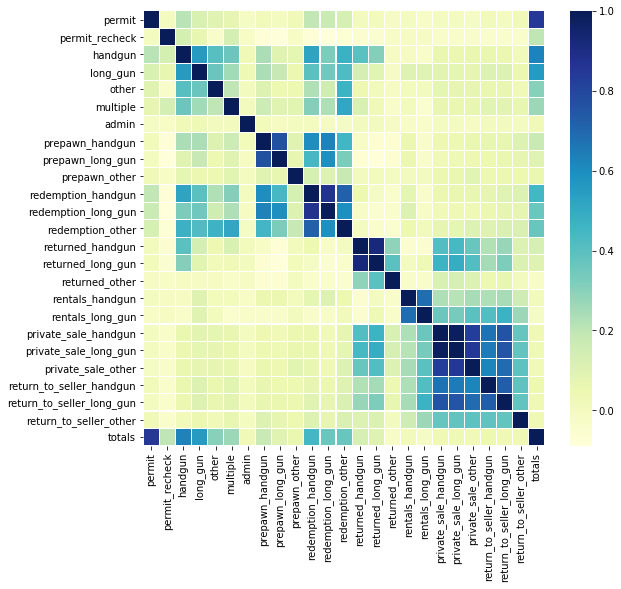

In [51]:
corrmat = gu.corr()   
f, ax = plt.subplots(figsize =(9, 8)) 
sns.heatmap(corrmat, ax = ax, cmap ="YlGnBu", linewidths = 0.1) 

Above: Correlation Matrix to describe relationships between variables.


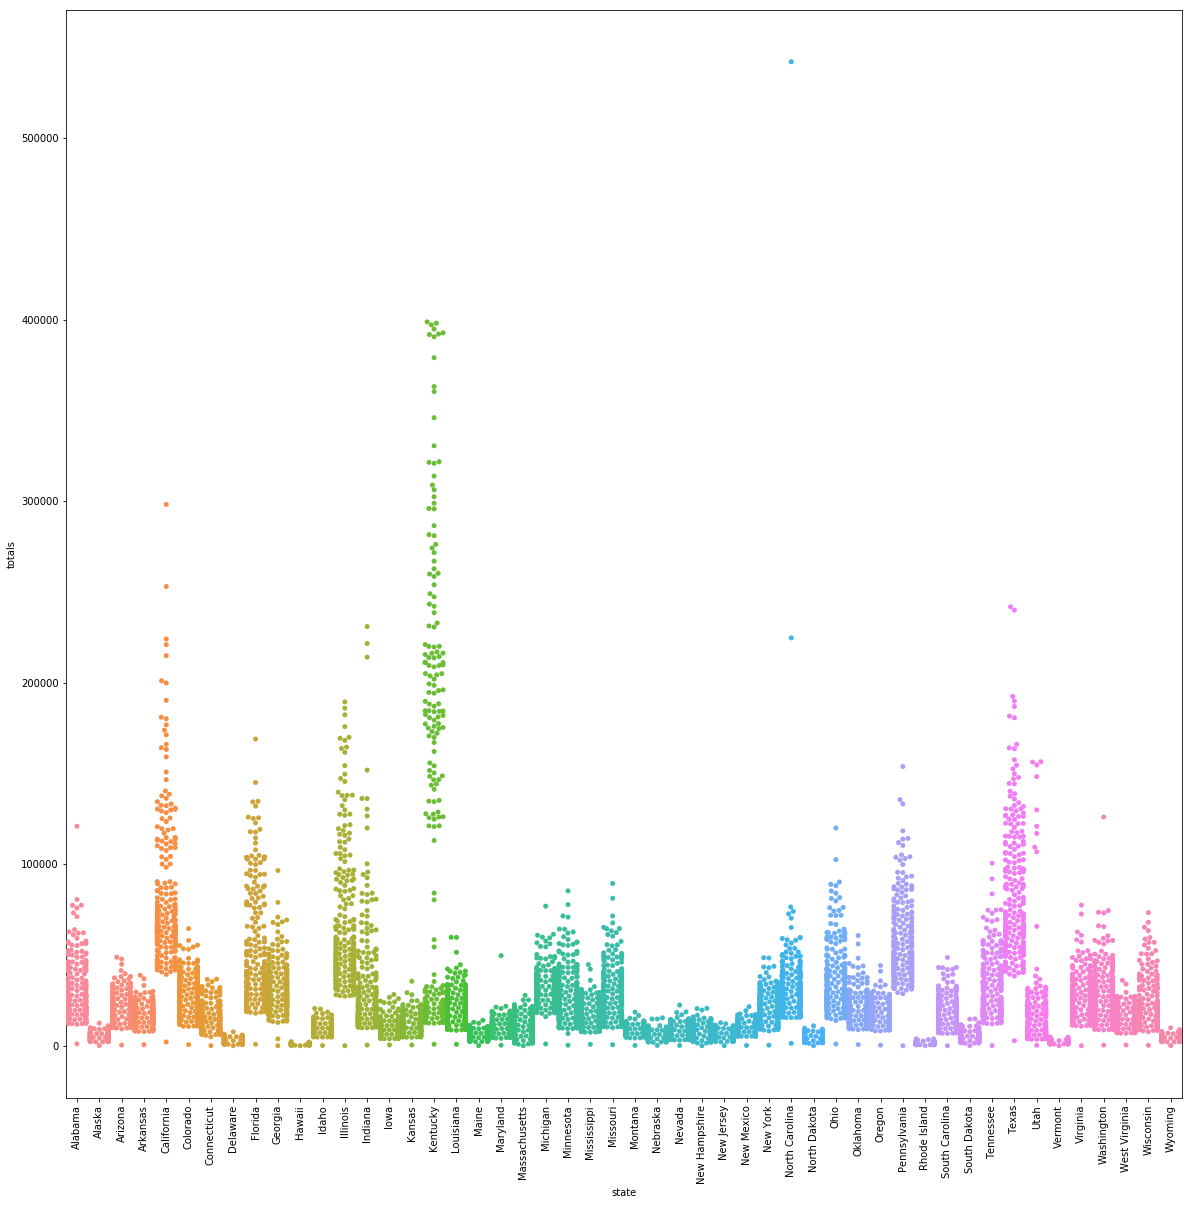

In [52]:
plt.subplots(figsize=(20,20))
plt.xticks(rotation=90);
sns.swarmplot(x='state', y='totals', data=gu);

Above: Correlation Matrix to describe relationships between state and totals.

### Research Question 1 (Gun pre capital 2010-2016)

What is the estimated number of civilians gun registration per capita by states in 2010 and 2016 ??

In [53]:
# Merge census 2010 and 2016
cens_diff = ce_10.merge(ce_16, on='state', how='left')
cens_diff.head()

Fact,state,"Population estimates base, April 1, 2010, (V2016)","Population estimates, July 1, 2016, (V2016)"
0,index,1.0,0.0
1,Alabama,4780131.0,4863300.0
2,Alaska,710249.0,741894.0
3,Arizona,6392301.0,6931071.0
4,Arkansas,2916025.0,2988248.0


In [54]:
cens_diff.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51 entries, 0 to 50
Data columns (total 3 columns):
state                                                 51 non-null object
Population estimates base, April 1, 2010,  (V2016)    51 non-null float32
Population estimates, July 1, 2016,  (V2016)          51 non-null float32
dtypes: float32(2), object(1)
memory usage: 1.2+ KB


In [55]:
def percent(value):
    if value > 0.001:
        result = value *100
    return result

Above: Function to Convert into a precentage %%

In [56]:
gun_diff = gu_2010.merge(gu_2016, on='state', how='left')
gun_diff.head() # will be used to find gun per capital

,month_x,state,totals_x,month_y,totals_y
0,2010-04-01,Alabama,20791,2016-07-01,48927
1,2010-04-01,Alaska,6411,2016-07-01,6793
2,2010-04-01,Arizona,16578,2016-07-01,34496
3,2010-04-01,Arkansas,14563,2016-07-01,19378
4,2010-04-01,California,80750,2016-07-01,190218


Above: Merge 'Gun' 2010 and 2016

In [57]:
# Finding Gun per capital in 2010
cap_2010 = gun_diff['totals_x'].sum()/cens_diff['Population estimates base, April 1, 2010,  (V2016)'].sum()
cap_2010

0.0039781327392522884

Above: Finding Gun per capital in 2010

In [58]:
# Convert to prec.
percent(cap_2010)

0.39781327392522886

In [59]:
cap_2016 = gun_diff['totals_y'].sum()/cens_diff['Population estimates, July 1, 2016,  (V2016)'].sum()
cap_2016

0.0067779333771252155

Above: Finding Gun per capital in 2016

In [60]:
# Convert to prec.
percent(cap_2016)

0.67779333771252159

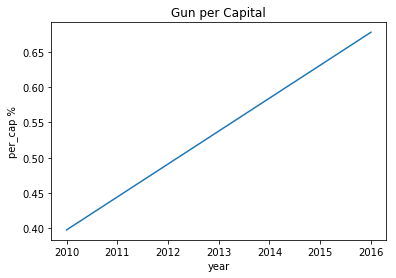

In [61]:
year = [2010, 2016]
per_cap = [0.39781327392522886, 0.67779333771252159]
plt.title('Gun per Capital')
plt.xlabel('year')
plt.ylabel('per_cap %')
plt.plot(year, per_cap)
plt.show()

Above: Finding out the chart per capital

#### Answers: 
* Gun per capital in 2010 is 0.397813274%
* Gun per capital in 2016 is 0.677793338%

### Research Question 2  (High gun by states in 2010 ,2016 and 2017)

Which states have had the highest growth in gun registrations in 2010,2016,and 2017?

In [62]:
# Merge cens_diff and gun_diff to check the connection
gu_meg = cens_diff.merge(gun_diff, on='state', how='left')
gu_meg.head()

,state,"Population estimates base, April 1, 2010, (V2016)","Population estimates, July 1, 2016, (V2016)",month_x,totals_x,month_y,totals_y
0,index,1.0,0.0,NaT,NaN,NaT,NaN
1,Alabama,4780131.0,4863300.0,2010-04-01,20791.0,2016-07-01,48927.0
2,Alaska,710249.0,741894.0,2010-04-01,6411.0,2016-07-01,6793.0
3,Arizona,6392301.0,6931071.0,2010-04-01,16578.0,2016-07-01,34496.0
4,Arkansas,2916025.0,2988248.0,2010-04-01,14563.0,2016-07-01,19378.0


In [63]:
gu_meg.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51 entries, 0 to 50
Data columns (total 7 columns):
state                                                 51 non-null object
Population estimates base, April 1, 2010,  (V2016)    51 non-null float32
Population estimates, July 1, 2016,  (V2016)          51 non-null float32
month_x                                               50 non-null datetime64[ns]
totals_x                                              50 non-null float64
month_y                                               50 non-null datetime64[ns]
totals_y                                              50 non-null float64
dtypes: datetime64[ns](2), float32(2), float64(2), object(1)
memory usage: 2.8+ KB


In [64]:
# display old dataframe
gu.head()

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
0,2017-09,Alabama,16717.0,0.0,5734.0,6320.0,221.0,317,0.0,15.0,...,0.0,0.0,0.0,9.0,16.0,3.0,0.0,0.0,3.0,32019
1,2017-09,Alaska,209.0,2.0,2320.0,2930.0,219.0,160,0.0,5.0,...,0.0,0.0,0.0,17.0,24.0,1.0,0.0,0.0,0.0,6303
2,2017-09,Arizona,5069.0,382.0,11063.0,7946.0,920.0,631,0.0,13.0,...,0.0,0.0,0.0,38.0,12.0,2.0,0.0,0.0,0.0,28394
3,2017-09,Arkansas,2935.0,632.0,4347.0,6063.0,165.0,366,51.0,12.0,...,0.0,0.0,0.0,13.0,23.0,0.0,0.0,2.0,1.0,17747
4,2017-09,California,57839.0,0.0,37165.0,24581.0,2984.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,123506


In [65]:
gu.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11350 entries, 0 to 12484
Data columns (total 27 columns):
month                        11350 non-null object
state                        11350 non-null object
permit                       11348 non-null float64
permit_recheck               1000 non-null float64
handgun                      11350 non-null float64
long_gun                     11350 non-null float64
other                        5000 non-null float64
multiple                     11350 non-null int64
admin                        11348 non-null float64
prepawn_handgun              9597 non-null float64
prepawn_long_gun             9595 non-null float64
prepawn_other                4650 non-null float64
redemption_handgun           9600 non-null float64
redemption_long_gun          9598 non-null float64
redemption_other             4650 non-null float64
returned_handgun             2000 non-null float64
returned_long_gun            1950 non-null float64
returned_other       

In [66]:
# Make table for 2017
gu_2017 = gu[gu['month'] == '2017-09']
gu_2017.head()

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
0,2017-09,Alabama,16717.0,0.0,5734.0,6320.0,221.0,317,0.0,15.0,...,0.0,0.0,0.0,9.0,16.0,3.0,0.0,0.0,3.0,32019
1,2017-09,Alaska,209.0,2.0,2320.0,2930.0,219.0,160,0.0,5.0,...,0.0,0.0,0.0,17.0,24.0,1.0,0.0,0.0,0.0,6303
2,2017-09,Arizona,5069.0,382.0,11063.0,7946.0,920.0,631,0.0,13.0,...,0.0,0.0,0.0,38.0,12.0,2.0,0.0,0.0,0.0,28394
3,2017-09,Arkansas,2935.0,632.0,4347.0,6063.0,165.0,366,51.0,12.0,...,0.0,0.0,0.0,13.0,23.0,0.0,0.0,2.0,1.0,17747
4,2017-09,California,57839.0,0.0,37165.0,24581.0,2984.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,123506


In [67]:
gu_2017.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50 entries, 0 to 54
Data columns (total 27 columns):
month                        50 non-null object
state                        50 non-null object
permit                       50 non-null float64
permit_recheck               50 non-null float64
handgun                      50 non-null float64
long_gun                     50 non-null float64
other                        50 non-null float64
multiple                     50 non-null int64
admin                        50 non-null float64
prepawn_handgun              50 non-null float64
prepawn_long_gun             50 non-null float64
prepawn_other                50 non-null float64
redemption_handgun           50 non-null float64
redemption_long_gun          50 non-null float64
redemption_other             50 non-null float64
returned_handgun             50 non-null float64
returned_long_gun            50 non-null float64
returned_other               50 non-null float64
rentals_handgun    

In [68]:
gu_2017.sort_values(by=['totals'], axis = 0, ascending = False).head(10)

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
18,2017-09,Kentucky,378384.0,0.0,8112.0,7543.0,253.0,543,1.0,16.0,...,0.0,0.0,0.0,21.0,19.0,1.0,2.0,1.0,0.0,398706
46,2017-09,Texas,31390.0,0.0,39119.0,39416.0,2768.0,2473,0.0,59.0,...,0.0,0.0,0.0,121.0,87.0,13.0,2.0,5.0,0.0,128260
4,2017-09,California,57839.0,0.0,37165.0,24581.0,2984.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,123506
14,2017-09,Illinois,15712.0,71432.0,18290.0,10201.0,0.0,814,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,116449
9,2017-09,Florida,10784.0,0.0,39199.0,17949.0,2319.0,1721,1.0,18.0,...,0.0,0.0,0.0,11.0,9.0,0.0,0.0,1.0,0.0,77390
40,2017-09,Pennsylvania,23144.0,0.0,39825.0,13222.0,48.0,0,179.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,77003
45,2017-09,Tennessee,16887.0,0.0,19219.0,13746.0,1042.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,50945
37,2017-09,Ohio,8741.0,490.0,21085.0,14998.0,1202.0,1026,0.0,9.0,...,0.0,0.0,0.0,58.0,36.0,4.0,1.0,1.0,0.0,49942
15,2017-09,Indiana,18241.0,0.0,16093.0,11332.0,1123.0,597,79.0,5.0,...,0.0,0.0,0.0,75.0,57.0,6.0,4.0,4.0,0.0,48524
25,2017-09,Minnesota,25645.0,0.0,4862.0,12677.0,346.0,273,0.0,1.0,...,1.0,0.0,0.0,13.0,16.0,0.0,0.0,1.0,1.0,44552


Above: Sort it in opposite direction

List of 10 high gun by states in 2017
1. Kentucky
2. Texas
3. California
4. Illinois
5. Florida
6. Pennsylvania
7. Tennessee
8. Ohio
9. Indiana
10. Minnesota

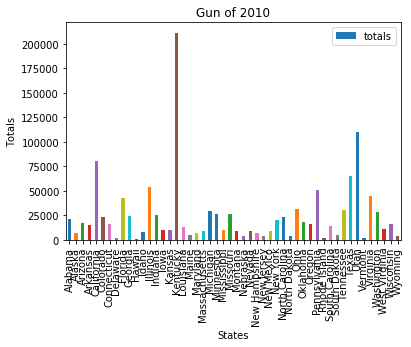

In [69]:
gu_2010.plot(x='state', y='totals', kind='bar', title='Gun of 2010');
plt.ylabel('Totals')
plt.xlabel('States')
plt.show()

Above: show plot gun of 2010

In [70]:
#List 10 states with high gun in 2010
gu_2010.sort_values(by=['totals'], axis = 0, ascending = False).head(10)

,month,state,totals
16,2010-04-01,Kentucky,211261
43,2010-04-01,Utah,109391
4,2010-04-01,California,80750
42,2010-04-01,Texas,65012
12,2010-04-01,Illinois,53929
37,2010-04-01,Pennsylvania,50249
45,2010-04-01,Virginia,44137
8,2010-04-01,Florida,42794
34,2010-04-01,Ohio,31312
41,2010-04-01,Tennessee,30453


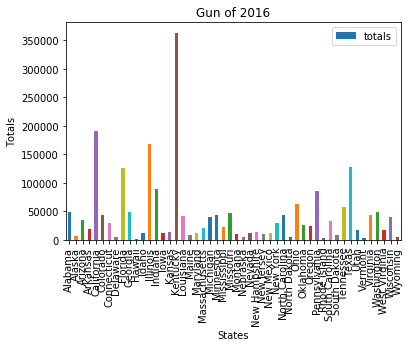

In [83]:
gu_2016.plot(x='state', y='totals', kind='bar',title='Gun of 2016'); #Compare to 2017
plt.ylabel('Totals')
plt.xlabel('States')
plt.show()

Above: show plot gun of 2016

In [72]:
gu_2016.sort_values(by=['totals'], axis = 0, ascending = False).head(10)

,month,state,totals
16,2016-07-01,Kentucky,363085
4,2016-07-01,California,190218
12,2016-07-01,Illinois,168227
42,2016-07-01,Texas,127207
8,2016-07-01,Florida,125208
13,2016-07-01,Indiana,88340
37,2016-07-01,Pennsylvania,86137
34,2016-07-01,Ohio,63148
41,2016-07-01,Tennessee,57653
9,2016-07-01,Georgia,49183


Above: high gun by state in 2016

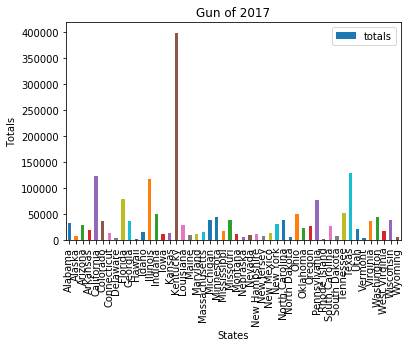

In [73]:
gu_2017.plot(x='state', y='totals', kind='bar', title='Gun of 2017');
plt.ylabel('Totals')
plt.xlabel('States')
plt.show()

Above: show plot gun of 2017

#### Answers:
##### Highest gun registration in 2010 by states:
- Kentucky  
- Utah  
- California    
- Texas 
- Illinois  
- Pennsylvania  
- Virginia  
- Florida   
- Ohio  
- Tennessee 

##### Highest gun registration in 2016 by states:
- Kentucky  
- California    
- Illinois  
- Texas 
- Florida   
- Indiana
- Pennsylvania  
- Ohio  
- Tennessee 
- Georgia   

##### List of 10 high gun by states in 2017
- Kentucky
- Texas
- California
- Illinois
- Florida
- Pennsylvania
- Tennessee
- Ohio
- Indianna
- Minnesota

### Research Question 3 (Gun Trend)

What is the most purchased type of gun in 2017?

In [74]:
# 2017 
gu_2017.head()

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
0,2017-09,Alabama,16717.0,0.0,5734.0,6320.0,221.0,317,0.0,15.0,...,0.0,0.0,0.0,9.0,16.0,3.0,0.0,0.0,3.0,32019
1,2017-09,Alaska,209.0,2.0,2320.0,2930.0,219.0,160,0.0,5.0,...,0.0,0.0,0.0,17.0,24.0,1.0,0.0,0.0,0.0,6303
2,2017-09,Arizona,5069.0,382.0,11063.0,7946.0,920.0,631,0.0,13.0,...,0.0,0.0,0.0,38.0,12.0,2.0,0.0,0.0,0.0,28394
3,2017-09,Arkansas,2935.0,632.0,4347.0,6063.0,165.0,366,51.0,12.0,...,0.0,0.0,0.0,13.0,23.0,0.0,0.0,2.0,1.0,17747
4,2017-09,California,57839.0,0.0,37165.0,24581.0,2984.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,123506


###### Checking differences

In [75]:
gu_2017['handgun'].sum()

477315.0

In [76]:
gu_2017['long_gun'].sum()

417126.0

In [77]:
gu_2017['other'].sum()

26897.0

In [78]:
gu_2017['multiple'].sum()

17612

Sum of Guns['Handgun', 'Ling_gun', 'other', 'multiple']

In [79]:
#Trend Gun bought (other, mutiple, handgun_long_gun)
gun_tr = ['handgun', 'long_gun', 'other', 'multiple']
purchs = [477315, 417126,26897,17612]

Above: trend Guns

In [80]:
y = np.arange(len(gun_tr))
y

array([0, 1, 2, 3])

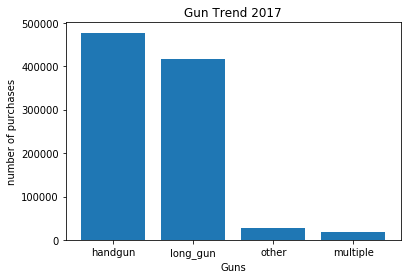

In [87]:
plt.xticks(y, gun_tr)
plt.ylabel('number of purchases')
plt.xlabel('Guns')
plt.title('Gun Trend 2017')
plt.bar(y, purchs)
plt.legend()

Chart of Gun Trend 2017 & number of purchases

##### Answers:
###### Most Purchased Gun in 2017
1. Handgun
2. Longun
3. other
4. multiple

<a id='conclusions'></a>
## Conclusions

In conclusion, The gun and census data shared similar variables such as states and date. Comparing and contrasting both data by countries and date would give the idea about the gun registration per capita in 2010 and 2016. Gun registration per capita in 2010 equal to 0.398%; in 2017, gun registration per capita is equivalent to 0.678%. Additionally, states such as Kentucky, California, Texas, Florida, and Ohio are the most common states with high gun records in 2010, 2016, and 2017. The type of guns that the population in the United States purchased the most in 2017 are primarily handguns; second is the long_guns and other types of firearms.

#### limitation:
there are missing data for U.S colonies such as Puerto Rico, Guam, and others in census_data. It would be appropriate to include them in census data to calculate and check the result of gun per capita. Secondly, Kentucky might be an outlier among the states. By observing Kentucky from 2010,2016, 2017-- the record is surprisingly higher than other American states like Lousiana. In my opinion, "it would be reasonable to recheck the data from Kentucky". In different ways, Illinois might be an outlier too because it has been registered a high gun registration in the U.S-- however, Illinois has the strictest gun control in America. It is advised to "further the investigation of the states of Illinois."

In [88]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0